In [88]:
import chromadb
import json

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(name="proper3_collection")

# Step 1: Read the JSON file
with open('Rawdata.json', 'r') as file:
    data = json.load(file)

# Step 2: Process the data
documents = []
metadatas = []
ids = []

for item in data:
    # Concatenate caption and mentioned for the document
    document = f"{item['caption']} {item['mentioned']}"
    documents.append(document)
    
    # Create metadata with Plots and web location
    metadata = {"mentioned": item["mentioned"], "Plots": item["Plots"], "web_location": item["web location"]}
    metadatas.append(metadata)
    
    # Use Plots value as the ID
    ids.append(item["Plots"])

# Step 3: Use the structured data with collection.add
collection.add(documents=documents, metadatas=metadatas, ids=ids)

UniqueConstraintError: Collection proper3_collection already exists

In [90]:
results = collection.query(
    query_texts=["this is our document"],
    n_results=3
)

In [91]:
print(results)

{'ids': [['fig01c.png', 'fig01a.png', 'fig01b.png']], 'distances': [[1.8494210243225098, 1.8687033653259277, 1.8726402521133423]], 'metadatas': [[{'Plots': 'fig01c.png', 'mentioned': 'An example is shown in Fig. 1c. A second contribution arises from \\(t\\bar{t}\\) production in association with light-quark (\\(u\\), \\(d\\), \\(s\\)) or gluon jets, referred to as \\(t\\bar{t}\\)+light background, and from \\(t\\bar{t}\\) production in association with \\(c\\)-quarks, referred to as \\(t\\bar{t}\\)+\\(c\\bar{c}\\). The size of the second contribution depends on the misidentification rate of the algorithm used to identify \\(b\\)-quark jets.', 'web_location': 'https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2013-27/fig_01c.png'}, {'Plots': 'fig01a.png', 'mentioned': 'Figure 1a, b show two examples of tree-level diagrams for \\(t\\bar{t}H\\) production with a subsequent \\(H\\to b\\bar{b}\\) decay. A search for the associated production of the Higgs boson with a top-quark pair

Caption: fig01c.png
Web Location: https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2013-27/fig_01c.png
Paragraphs:
An example is shown in Fig
1c
A second contribution arises from \(t\bar{t}\) production in association with light-quark (\(u\), \(d\), \(s\)) or gluon jets, referred to as \(t\bar{t}\)+light background, and from \(t\bar{t}\) production in association with \(c\)-quarks, referred to as \(t\bar{t}\)+\(c\bar{c}\)
The size of the second contribution depends on the misidentification rate of the algorithm used to identify \(b\)-quark jets.


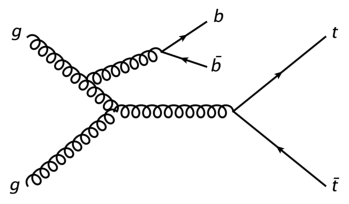

In [92]:
import matplotlib.pyplot as plt
import urllib
from PIL import Image

# Extract information from the results dictionary
ids = results['ids'][0]
distances = results['distances'][0]
metadatas = results['metadatas'][0]
web_location = metadatas[0]['web_location']
caption = metadatas[0]['Plots']
paragraphs = metadatas[0]['mentioned']

# Print captions and save URL and captions of paragraphs
print(f"Caption: {caption}")
print(f"Web Location: {web_location}")
print("Paragraphs:")
for paragraph in paragraphs.split('. '):
    print(paragraph)

# Download and display the picture
image_url = web_location
image_path = 'temp_image.png'
urllib.request.urlretrieve(image_url, image_path)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
